## simple example

* generate a signal in time domain $x(t)$
* convert the singal to frequency domain $X(\omega)$
* calculated a frf $H(\omega)$
* convert the frf in ir $h(t)$ just to see it
* do the convolution $fft\{x * h\} = X(\omega) \cdot H(\omega)$

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import librosa.display
import IPython.display as ipd

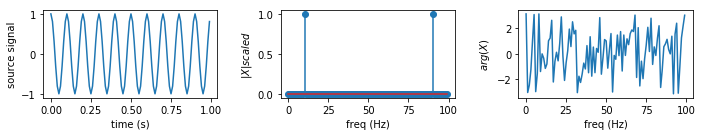

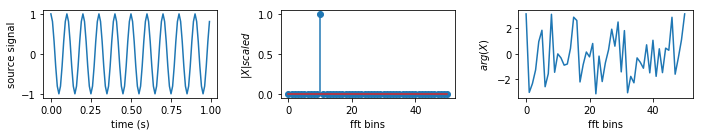

In [15]:
# this is the support in time domain -- bounded to the wave frequency
wave_frequency = 10 # p in the book, this is the signal frequency
wave_amplitude = 1
sample_period = 1/wave_frequency
sample_rate = 10/sample_period # samples per sec (rule of thumb is at least 2x the cut off frequency)
total_sampling_time = 10*sample_period # 10 points DFT
num_samples = sample_rate * total_sampling_time

t = np.arange(0, total_sampling_time, 1/sample_rate)

# signal generator
fun = lambda x: wave_amplitude * np.cos(wave_frequency * 2*np.pi * x)
signal = [fun(i) for i in t]

samples = len(signal)
frq = sample_rate * np.arange(0.1,samples) / samples
# perform the dft of signal - real signal -> complex , symmetric and conjugated response.
X = np.fft.fft(signal)
#half the sample alternative method.
Xr = np.fft.rfft(signal)

# plot
fig, (ax,ax2,ax3)= plt.subplots(1,3, figsize=(10, 2))
ax.plot(t, signal)
ax.set(xlabel='time (s)', ylabel='source signal')
# Because the power of the signal in time and frequency domain have to be equal, 
# and we just used the left half of the signal, now we need to multiply the amplitude with the factor of 2
ax2.stem(frq, 2*np.abs(X)/sample_rate/total_sampling_time)
ax2.set(xlabel='freq (Hz)', ylabel='$|X| scaled$')
ax3.plot(frq, np.angle(X))
ax3.set(xlabel='freq (Hz)', ylabel='$arg(X)$')
plt.tight_layout()

# plot alternatively
fig, (ax,ax2,ax3)= plt.subplots(1,3, figsize=(10, 2))
ax.plot(t, signal)
ax.set(xlabel='time (s)', ylabel='source signal')
ax2.stem(2*np.abs(Xr)/sample_rate/total_sampling_time)
ax2.set(xlabel='fft bins', ylabel='$|X| scaled$')
ax3.plot(np.angle(Xr))
ax3.set(xlabel='fft bins', ylabel='$arg(X)$')
plt.tight_layout()


Since **exact number of periods** is taken for DFT, all the frequency components except signal frequency = 1 Hz (and 9 Hz, which is the mirror image of signal frequency in Hz)


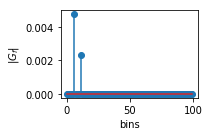

In [21]:
# sound speed
c = 344.0
# propagation distance
rd = 20
# receiver and source heights
zr = 12
zs = 20

# receiver distance from origin
xr = np.sqrt(rd**2 - (zs-zr)**2) / (1 + zs/zr)

# find the incident angle (theta) from heights and propagation distance (zs,zr,rd)
theta = np.arctan(zr/xr)
# source distance from origin
xs = zs / np.tan(theta)

# image source euclidian distance to receiver
d1 = zs / np.sin(theta) + zr/np.sin(theta)

# image source position 
xis = -xs 
zis = -zs

# density kg.m^-3
rho = 1.2

# greens function
def greens(d,t):
        #initialize the green function in time domain
        g = np.zeros(len(t))
        # propagation time direct wave
        t0 = d / c
        # match = correspondence index of times ts(index) in time axis t
        match = np.argmin( np.abs( t - t0))
        g[match] = rho / (4 * np.pi * d)
        return g
    
# green function (impulse response) from direct source (ri w/ i=0,1) to receiver (r)
gt0 = greens(rd,t)
# green function (impulse response) from direct source to receiver
gt1 = greens(d1,t)

R = 0.9

Gt =  gt0 + R * gt1

# plot
fig, ax= plt.subplots(1,1, figsize=(3, 2))
ax.stem(np.abs(Gt))
ax.set(xlabel='bins', ylabel='$|G_f|$')
plt.tight_layout()


perform the the linear convolution using the DFT

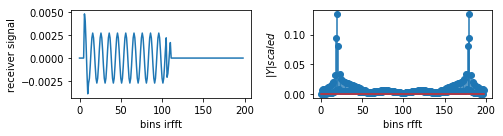

In [17]:
y = np.convolve(Gt,signal)
Y = np.fft.fft(y)

fig, (ax,ax2)= plt.subplots(1,2, figsize=(7, 2))
ax.plot(y)
ax.set(xlabel='bins irfft', ylabel='receiver signal')
ax2.stem(np.abs(Y))
ax2.set(xlabel='bins rfft', ylabel='$|Y| scaled$')
plt.tight_layout()